In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [ ]:
# Generate a random n-class regression problem.
# make_regression helps in creating Random datasets

In [3]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.29551966, -2.089815  ],
       [-0.89618675,  0.27147204],
       [ 1.61287866,  1.97933722],
       ...,
       [ 0.9082385 ,  0.37556771],
       [ 1.00088498,  1.04836955],
       [ 0.51035699,  0.63703231]])

In [5]:
y

array([-1.23627104e+02, -6.23587828e+00,  1.59180057e+02,  8.09618430e+01,
        3.98130148e+01, -6.80128809e+01, -2.14767451e+01, -6.78190064e+01,
       -2.02599903e+01,  1.33162305e+01, -4.85601342e+01,  5.71699071e+01,
        4.15594577e+01, -3.33654044e+01,  3.16248329e+01,  7.62441580e+01,
        2.05188366e+01, -4.37357205e+01,  7.50127168e+01,  6.96879165e+01,
       -5.18820465e+01, -4.56171518e+00, -2.07422948e+01,  1.50842407e+01,
        4.04101561e-01,  2.70710181e+01,  2.80338897e+01,  8.38926110e+00,
       -7.12033690e-01,  3.28826205e+01,  1.38014741e+01, -3.06767554e+01,
        5.72213806e+01,  3.24092637e+01,  2.89415961e+01,  1.89084363e+01,
       -7.35509501e+01, -6.38705662e+01,  4.96046204e+01,  2.45541759e+01,
        5.72695733e+01,  5.43937403e+01,  1.15130039e+02,  1.21628151e+01,
        1.42029627e+01, -8.50159126e+01, -1.29641905e+01, -5.73305480e+01,
        5.99233739e+01, -3.46903649e+01,  2.57292890e+01,  3.43610204e+01,
       -4.47821337e+00, -

<Axes: xlabel='0', ylabel='1'>

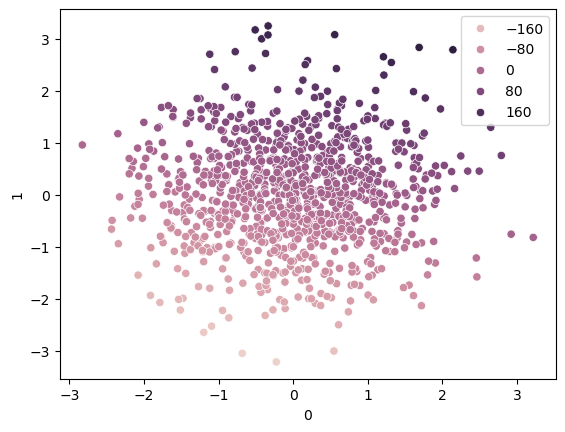

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
# NOw for the above data i will create Support Vector Regreesor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[21.24761858, 61.71695298]])

In [16]:
y_pred = svr.predict(X_test)

In [17]:
y_pred

array([ -33.28182416,  -26.49313818,   56.03011652,   42.53509337,
        -51.21160854,   11.38062789,  -94.14450147,   10.46739863,
         59.90418407,  -33.36362795,   67.53989452,  -65.55082287,
        -82.16376842,  -59.93192258,   57.27624008,  -16.70519504,
         26.30366257,  -36.78004387, -106.11729681,   53.63578874,
         15.71303159,    8.98129263,   77.66120068,   39.45353513,
         32.03524287,   19.68794037,   91.00802973,   64.28895408,
         -1.22289244,  114.63147243,   49.00716099,  189.2200418 ,
         -5.84220373,  -10.20190367,   70.99425954,  -13.93048236,
         -4.67613815,    5.45420593,  105.69048149, -119.47038663,
          2.01571099,  -54.28703662,   -8.67418932,   24.19079679,
         24.10422345,   65.16398816,  -17.66460409,   36.29688678,
         41.48382739,  -25.64949444,    7.26409235,  -69.10788862,
        -41.40663293,   38.9532269 ,  210.55117618,  -95.93836081,
        -73.22541138,   14.66558979,   44.46381138,  -17.84598

In [18]:
from sklearn.metrics import r2_score

In [20]:
print(r2_score(y_test,y_pred))

0.9978134231408573


In [21]:
## Hyperparameter tuning WIth SVR

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameter = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [25]:
gs_svr = GridSearchCV(SVR(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [26]:
gs_svr.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.911 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.922 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.911 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [27]:
gs_svr.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [29]:
## Prediction
y_pred = gs_svr.predict(X_test)
print(r2_score(y_test,y_pred))

0.9978470140658979
